<table>
    <tr> <td valign="center"> <img src="LogoSTIMULATE.png" width=450pt> </td>
        <td valign="center" width="80%"> <b>Workshop on Mathematical Modeling and Numerical Analysis for Exascale, April 8-18, 2019</b></td>
        <td valign="center"> <img src="LogoHU.png" width=150pt> </td>
    </tr>
</table>

# Programming 7

## Splitting Methods for ODEs and PDEs

### Matrix Exponential

In [1]:
from scipy.linalg import expm, sinm, cosm
from numpy import array, exp

M = array([[0.0, 0.0], [0.0, 0.0]])
print('exp(M) =')
print(expm(M))

A = array([[1.0, 2.0], [3.0, 4.0]])
print('exp(A) =')
print(expm(A))

exp(M) =
[[1. 0.]
 [0. 1.]]
exp(A) =
[[ 51.9689562   74.73656457]
 [112.10484685 164.07380305]]


Test of Euler's identity $\exp(iM)=\cos(M)+i\sin(M)$ for matrices:

In [2]:
print(expm(1j*A)-cosm(A)-1j*sinm(A))

[[0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]]


### Ordinary splitting

We consider
\begin{align*}
  x'(t) = \color{red}{f}(x(t)) + \color{blue}{g}(x(t)), \quad x(t_0)=x_0
\end{align*}

and the splitting method
\begin{align*}
  \color{red}{u'(t)} &\ \color{red}{= f(u(t)), \quad u(t_0)=u_0}=x_0\\
  \color{blue}{v'(t)} &\ \color{blue}{= g(v(t)), \quad v(t_0)=v_0} =
  \color{red}{u(t_0+\tau)} \\
  x(t_0+\tau) &= \color{blue}{v(t_0+\tau)}
\end{align*}

In [3]:
def splitting_Euler_explicit_step(x,f,g,tau): 
    # explicit Euler step for first system
    u = x
    unew = u + tau*f(u) 
    # explicit Euler step for second system
    v = unew
    vnew = v + tau*g(v)
    xnew = vnew
    return xnew

### Strang Splitting

\begin{align*}
  \color{red}{u'(t)} &\ \color{red}{= f(u(t)),
    \quad u(t_0)=u_0} = x_0\\
  \color{blue}{v'(t)} &\ \color{blue}{= g(v(t)),
    \quad v(t_0)=v_0} = \color{red}{u(t_0+\tau/2)}\\
  \color{red}{u'(t)} &\ \color{red}{= f(u(t)),
    \quad u(t_0+\tau/2)} = \color{blue}{v(t_0+\tau)}\\
  x(t_0+\tau) &= \color{red}{u(t_0+\tau)}
\end{align*}

In [4]:
def Strang_splitting_Euler_explicit_step(x,f,g,tau): 
    # explicit Euler step for first system
    u = x
    unew = u + 0.5*tau*f(u) 
    # explicit Euler step for second system
    v = unew
    vnew = v + tau*g(v)
    # explicit Euler step for third system
    u = vnew
    ufinal = vnew + 0.5*tau*f(u)
    xnew = ufinal
    return xnew

We take as an example the logistic differential equation
\begin{align*}
  x'(t) = x(1-x) = \color{red}{x} - \color{blue}{x^2}
\end{align*}

The exact solution with $x(0)=x_0\neq 0$ is given as
\begin{align*}
  x(t) = \frac{1}{c\exp(-t)+1}
\end{align*}
with the constant
\begin{align*}
  c = \frac{1-x_0}{x_0}.
\end{align*}

In [5]:
def f(x):
    return x

def g(x):
    return -x**2

Compute a solution on the time interval $[0,10]$:

In [6]:
# time integration from t0 to T
# using splitting method with explicit Euler for each subsystem
from numpy import array
x0 = array([0.1]) # initial value
t0 = 0.0  # initial time point
T  = 10.0  # final time point
tau = 0.1 # time step size

# initalize list of timepoints t_n
timepoints = [t0]

# initalize list of solutions for x_n (approximations of x(t_n))
x_splitting_Euler_explicit   = [x0]
x_Strang_Euler_explicit   = [x0]

t = t0
x = x0
x2 = x0

while t<T:
    tnew = t + tau
    if tnew>T-1e-10: # correction of last time step due to rounding errors
        tnew = T
        tau = T-t
    xnew = splitting_Euler_explicit_step(x,f,g,tau)
    xnew2 = Strang_splitting_Euler_explicit_step(x2,f,g,tau)
    
    timepoints.append(tnew)
    x_splitting_Euler_explicit.append(xnew)
    x_Strang_Euler_explicit.append(xnew2)
    
    # shift for next step
    t = tnew
    x = xnew
    x2 = xnew2

plot the solutions:

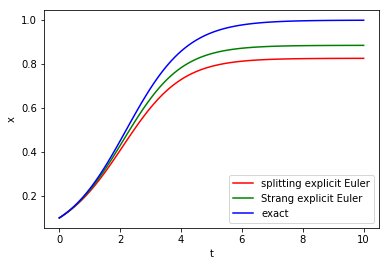

In [8]:
# plot the solution
from matplotlib import pyplot

timepoints_array = array(timepoints)
c = 1.0/x0 - 1.0
x_exact = 1.0/(c*exp((-1)*timepoints_array)+1)

# form arrays from lists for convenient plotting
x_splitting_explicit_array   = array(x_splitting_Euler_explicit)    
x_Strang_explicit_array   = array(x_Strang_Euler_explicit)    

# select the solutions
x_splitting_explicit = x_splitting_explicit_array[:,0]
x_Strang_explicit = x_Strang_explicit_array[:,0]

# plot the solutions
pyplot.plot(timepoints, x_splitting_explicit, color='red')
pyplot.plot(timepoints, x_Strang_explicit, color='green')
pyplot.plot(timepoints, x_exact, color='blue')


# add legend
pyplot.legend(["splitting explicit Euler","Strang explicit Euler","exact"])
pyplot.xlabel("t")
pyplot.ylabel("x")

pyplot.savefig("7_splitEulerexplicit.png")
pyplot.show()

### Exercise 1

Compute the solution for the Strang splitting with the explicit Euler scheme and plot it in the same figure as above.

- Solved above

### Exercise 2

Compare the solutions obtained by the splitting methods with the results when applying the explicit Euler directly to the original system (without splitting)!

In [9]:
def f(x):
    return x

def g(x):
    return -x**2

In [10]:
def Euler_explicit_step(x,f,g,tau): 
    # explicit Euler step for the complete system x' = f(x(t)) + g(x(t))
    xnew = x + tau*(f(x) + g(x))
    return xnew

In [11]:
# time integration from t0 to T
# using splitting method with explicit Euler for each subsystem
from numpy import array
x0 = array([0.1]) # initial value
t0 = 0.0  # initial time point
T  = 10.0  # final time point
tau = 0.1 # time step size

# initalize list of timepoints t_n
timepoints = [t0]

# initalize list of solutions for x_n (approximations of x(t_n))
x_splitting_Euler_explicit   = [x0]
x_Euler_explicit   = [x0]

t = t0
x = x0
x2 = x0

while t<T:
    tnew = t + tau
    if tnew>T-1e-10: # correction of last time step due to rounding errors
        tnew = T
        tau = T-t
    xnew = splitting_Euler_explicit_step(x,f,g,tau)
    xnew2 = Euler_explicit_step(x2,f,g,tau)
    
    timepoints.append(tnew)
    x_splitting_Euler_explicit.append(xnew)
    x_Euler_explicit.append(xnew2)
    
    # shift for next step
    t = tnew
    x = xnew
    x2 = xnew2

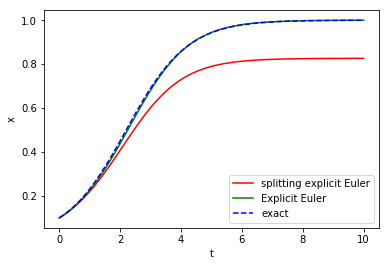

In [12]:
# plot the solution
from matplotlib import pyplot

timepoints_array = array(timepoints)
c = 1.0/x0 - 1.0
x_exact = 1.0/(c*exp((-1)*timepoints_array)+1)

# form arrays from lists for convenient plotting
x_splitting_explicit_array   = array(x_splitting_Euler_explicit)    
x_Euler_array   = array(x_Euler_explicit)    

# select the solutions
x_splitting_explicit = x_splitting_explicit_array[:,0]
x_Euler_explicit = x_Euler_array[:,0]

# plot the solutions
pyplot.plot(timepoints, x_splitting_explicit, color='red')
pyplot.plot(timepoints, x_Euler_explicit, color='green')
pyplot.plot(timepoints, x_exact, color='blue',linestyle='--')


# add legend
pyplot.legend(["splitting explicit Euler","Explicit Euler","exact"])
pyplot.xlabel("t")
pyplot.ylabel("x")

pyplot.savefig("7_splitEulerexplicit.png")
pyplot.show()

### Exercise 3

Take the example:
\begin{align*}
  x'(t) = \color{red}{ax} - \color{blue}{x^2}
\end{align*}

The exact solution with $x(0)=x_0\neq 0$ is given as
\begin{align*}
  x(t) = \frac{a}{c\exp(-at)+1}
\end{align*}
with the constant
\begin{align*}
  c = \frac{a-x_0}{x_0}.
\end{align*}

Check the behaviour of the splitting methods for different values of $a$, e.g. for large $a$ and small $a$! Take care of the time stepsize $\tau$!

In [13]:
# time integration from t0 to T
# using splitting method with explicit Euler for each subsystem
from numpy import array
x0 = array([0.1]) # initial value
t0 = 0.0  # initial time point
T  = 10.0  # final time point
tau = 0.1 # time step size

a = -10

In [14]:
def f(x):
    return a*x

def g(x):
    return -x**2

In [15]:
# initalize list of timepoints t_n
timepoints = [t0]

# initalize list of solutions for x_n (approximations of x(t_n))
x_splitting_Euler_explicit   = [x0]
x_Strang_Euler_explicit   = [x0]

t = t0
x = x0
x2 = x0

while t<T:
    tnew = t + tau
    if tnew>T-1e-10: # correction of last time step due to rounding errors
        tnew = T
        tau = T-t
    xnew = splitting_Euler_explicit_step(x,f,g,tau)
    xnew2 = Strang_splitting_Euler_explicit_step(x2,f,g,tau)
    
    timepoints.append(tnew)
    x_splitting_Euler_explicit.append(xnew)
    x_Strang_Euler_explicit.append(xnew2)
    
    # shift for next step
    t = tnew
    x = xnew
    x2 = xnew2

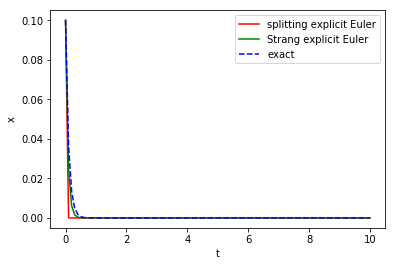

In [16]:
# plot the solution
from matplotlib import pyplot

timepoints_array = array(timepoints)
c = a/x0 - 1.0
x_exact = a/(c*exp((-a)*timepoints_array)+1)

# form arrays from lists for convenient plotting
x_splitting_explicit_array   = array(x_splitting_Euler_explicit)    
x_Strang_explicit_array   = array(x_Strang_Euler_explicit)    

# select the solutions
x_splitting_explicit = x_splitting_explicit_array[:,0]
x_Strang_explicit = x_Strang_explicit_array[:,0]

# plot the solutions
pyplot.plot(timepoints, x_splitting_explicit, color='red')
pyplot.plot(timepoints, x_Strang_explicit, color='green')
pyplot.plot(timepoints, x_exact, 'b--')


# add legend
pyplot.legend(["splitting explicit Euler","Strang explicit Euler","exact"])
pyplot.xlabel("t")
pyplot.ylabel("x")

pyplot.savefig("7_splitEulerexplicit.png")
pyplot.show()

- For small positive a, numerical solutions are close to exact one even for relatively large tau (a = 0.001, tau = 1.)
- For large positive a, tau must be decreased even more in order to achieve a good approximation (a = 10., tau = 0.001)
- For small negative a, we observe the same behaviour as in the positive case;
- For large negative a, good approximations can be achieved for larger tau than in the positive case (a = -10., tau  = 0.1) 